# Lineaire regressie - opdrachten

In dit notebook vind je 2 opdrachten over lineaire regressie. 

- <a href = "#linreg_opdracht1"> Opdracht 1 </a> bestaat uit 2 oefeningen die je maakt ter voorbereiding van het college.
- <a href = "#linreg_opdracht2"> Opdracht 2 </a> bestaat uit 6 stappen en die maak je tijdens het college.

<a id="linreg_opdracht1"></a>
## Opdracht 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
personen = pd.DataFrame({'lengte': [1.678, 1.755, 1.764, 1.821, 1.809, 1.851, 1.848, 1.902], 
                         'gewicht': [62.2, 67.2, 72.7, 76.4, 75.2, 81.3, 87.4, 90.4]})

In [3]:
personen

,lengte,gewicht
0,1.678,62.2
1,1.755,67.2
2,1.764,72.7
3,1.821,76.4
4,1.809,75.2
5,1.851,81.3
6,1.848,87.4
7,1.902,90.4


In [4]:
r = personen['gewicht'].corr(personen['lengte'])
print(f'Pearsons correlatiecoëfficient r = {r}')

Pearsons correlatiecoëfficient r = 0.9573607425326734


### Opdracht 1a: bepaal handmatig de beste coëfficienten

Zoek de _beste_ lineaire formule die het gewicht $y$ voorspelt gegeven lengte $x$ met richtingscoëfficient $a$ en intercept $b$. Je vindt de beste formule door de _sum of squared residuals_ (SSR, de som van het kwadraat van de residuen) te minimaliseren. Maak hiervoor gebruik van de grafiek die hieronder getekend wordt. De verticale rode lijnen representeren het residu bij elke meetwaarde.

Pas a en b zodanig aan dat je de 'Sum of squared residuals (SSR)' minimaliseert
Pas in deze cel a en b aan, run deze cel en de volgende cel en analyseer het resultaat aan de hand van de score die 
boven in de visualisatie getoond wordt

 - Tip 1: je kunt als eerste gok de coëfficienten uitrekenen op basis van een van de gegeven punten
 - Tip 2: je kunt de helling van de lijn aanpassen met a
 - Tip 3: je kunt de hoogte van de lijn aanpassen met b

In [5]:
# x-as loopt van minimum van lengte tot maximum van lengte
x = np.linspace((personen[['lengte']].min()-.03), personen[['lengte']].max()+.03)

In [6]:
# Geef hier de beste formule
a = (personen.loc[len(personen)-1, 'gewicht'] - personen.loc[0, 'gewicht'])/(personen.loc[len(personen)-1, 'lengte'] - personen.loc[0,'lengte'])
b = personen.loc[0,'gewicht']-a*personen.loc[0,'lengte'] - 1
y = a*x+b

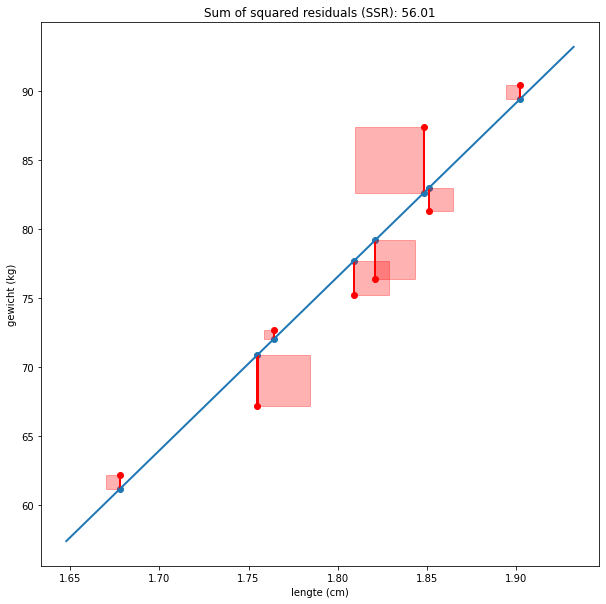

In [7]:
# Make predictions
personen['gewicht_voorspeld'] = a * personen[['lengte']] + b 
personen['residu'] = (personen['gewicht_voorspeld'] - personen['gewicht'])
personen['square'] = personen['residu']**2
ssr = personen['square'].sum()

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

plt.title('Sum of squared residuals (SSR): {:.2f}'.format(ssr))
plt.xlabel('lengte (cm)')
plt.ylabel('gewicht (kg)')

ratio = (x.max()-x.min())/(y.max()-y.min())

ax.plot(x,y, linewidth=2)
ax.scatter(personen['lengte'], personen['gewicht_voorspeld'])
ax.scatter(personen['lengte'], personen['gewicht'], c='r')

# Create a Rectangle patch
for index, persoon in personen.iterrows():
    if ssr < 500:
        rect = patches.Rectangle((persoon['lengte'], persoon['gewicht']),
                                 persoon['residu']*ratio, persoon['residu'],
                                 linewidth=1,edgecolor='r', facecolor='r', alpha=.3)
        ax.add_patch(rect)
        
    rect = patches.Rectangle((persoon['lengte'], persoon['gewicht']),
                             0.00005, persoon['residu'],
                             linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

plt.show()

In [8]:
personen.corr().loc['gewicht','lengte']*personen.corr().loc['gewicht','lengte']

0.9165395913427121

### Opdracht 1b: bepaal de beste coëfficienten met behulp van Lineaire Regressie
We gaan nu de computer coëfficienten a en b laten bepalen met behulp van Lineaire Regressie. Voer de volgende stappen uit:

 - Kies het juiste modeltype
 - Kies de features en targetvariabele
 - Kies de hyperparameters
 - Train het model
 - Valideer de resultaten m.b.v. de RMSE (als je het echt goed doet, vergelijk je de resultaten met een baseline model...)
 
**Merk op**: je hoeft geen train-test split te maken want we willen dezelfde data gebruiken net als bij opdracht 1 zodat we beide acties kunnen vergelijken.

In [9]:
linreg = LinearRegression()

In [10]:
linreg.fit(personen[['lengte']],personen['gewicht'])

LinearRegression()

In [11]:
linreg.score(personen[['lengte']],personen['gewicht'])

0.9165395913427121

In [12]:
mse = mean_squared_error(personen['gewicht'], linreg.predict(personen[['lengte']]))

In [13]:
np.sqrt(mse)

2.588192622247342

In [14]:
r2_score(personen['gewicht'], linreg.predict(personen[['lengte']]))

0.9165395913427121

In [15]:
#Baseline -  stel we voorspellen overal het gemiddelde:
bl = np.full((len(personen), 1), y.mean())

In [16]:
np.sqrt(mean_squared_error(personen['gewicht'],bl))

9.052762009464296

In [17]:
a = linreg.coef_
b = linreg.intercept_

In [18]:
a

array([131.68424775])

In [19]:
b

-160.89254080971185

In [20]:
personen['gewicht_voorspeld'] = a * personen[['lengte']] + b 
personen['residu'] = (personen['gewicht_voorspeld'] - personen['gewicht'])
personen['square'] = personen['residu']**2
ssr = personen['square'].sum()

In [21]:
ssr

53.58992839884458

<a id="linreg_opdracht2"></a>
## Opdracht 2

In deze oefening gaan we onderzoeken of het verbruik van auto's is te voorspellen aan de hand van diverse kenmerken. Er worden eerst een aantal analyses en bewerkingen op de data uitgevoerd, voordat we starten met enkele opdrachten.

In [22]:
# Bronnen
# Dowload: https://archive.ics.uci.edu/ml/datasets/Auto+MPG 
# Omvormen naar csv: http://fatihsarigoz.com/autompg-data.html 
# Lineaire regressie: http://benalexkeen.com/linear-regression-in-python-using-scikit-learn/ 

In [23]:
# Libraries importeren

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
import matplotlib.pyplot as plt

In [24]:
# Analyseren welke attributen er in de dataset zitten. Als je de inhoud niet snapt, is het handig om ff te Googlen!

df = pd.read_csv('lineaire_regressie_auto_mpg.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'lineaire_regressie_auto_mpg.csv'

In [ ]:
# Inhoud van de attributen analyseren, check wat describe() doet met het attribuut `origin`

df.describe()

In [ ]:
# Drop name: die hebben we niet nodig 

df = df.drop('name', axis=1)

In [ ]:
# Origin lijkt een numerieke waarde, maar het is een categorie. 
# Dit attribuut moeten we aanpassen voordat we het kunnen gebruiken voor lineaire regressie

df = pd.get_dummies(df, columns=['origin'])
df.head()

In [ ]:
# Verkenning van de correlaties

print(df.corr()['mpg'])

plt.subplots(dpi=100)
plt.scatter(df['weight'], df['mpg'])
plt.show()

In [ ]:
sns.pairplot(df[['mpg','cylinders', 'displacement','horsepower','weight','acceleration','year']])

1. Kies het juiste modeltype

In [ ]:
linreg = LinearRegression()

2. Kies de hyperparameters

In [ ]:
#niet van toepassing

3. Organiseer de data: _features_ (eigenschappen) en _target_ (resultaat)

In [ ]:
X = df.drop('mpg', axis=1)
y = df.loc[:,'mpg']

4. Creëer een training- en validatieset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

5. Start het leerproces

In [ ]:
linreg.fit(X_train, y_train)


In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {:.3f}".format(col_name, linreg.coef_[idx]))

intercept = linreg.intercept_
print("The intercept for our model is {:.3f}".format(intercept))

6. Valideer het model

Bereken de determinatiecoëfficient $r^2$.

In [ ]:
r2_score(y_test, linreg.predict(X_test))

Bereken de *root mean squared error*, gebruik makend van `mean_squared_error()`.

In [ ]:
np.sqrt(mean_squared_error(linreg.predict(X_test), y_test))

Wat is de betekenis van dit getal?

De residuën hebben een standaarddeviatie van 3.24 mpg. De gemiddelde afwijking van de voorspelling is dus 3.24 mpg.

Wat gebeurt er met de lineaire regressie als je andere _features_ kiest? Welke deelverzameling van kenmerken is het beste?


In [ ]:
# Kolommen in volgorde van correlatiescore
cols = ['weight', 'displacement', 'horsepower', 'cylinders', 'year', 'acceleration', 'origin_1', 'origin_2', 'origin_3']

for c in range(len(cols)):
    X = df[cols[:c+1]]
    y = df[['mpg']]
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    linreg.fit(X_train, y_train)
    y_model = linreg.predict(X_test)
#     print(r2_score(y_test, y_model))
    print("Met features {} is de RMSE {:.3f}".format(cols[:c+1], np.sqrt(mean_squared_error(y_model, y_test))))